# AdEase Time Series



Project Due : **11 Feb 2023**




```Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.```




```You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.```




**Dataset:**


https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb



**Data Dictionary:**



***There are two csv files given***



- **train_1.csv**: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.



The page name contains data in this format:



```SPECIFIC NAME _``` ```LANGUAGE.wikipedia.org _``` ```ACCESS TYPE _``` ```ACCESS ORIGIN```


having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)



- **Exog_Campaign_eng**: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.



There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English




***Concepts Tested:***

- Exploratory data analysis


- Time Series forecasting- ARIMA, SARIMAX, and Prophet


- What does “good” look like?


- Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset


- Checking null values and understanding their reason.



- Understanding the page name format and splitting it to get different information.



- Separating different values from it like title, language, access type, and access origin.



- Visualizing the data and getting inferences from them



- Converting the data to a format that can be fed to the Arima model (Pivoting etc)



- Checking if the data is stationary



- Dickey-Fuller test



- Trying different methods for stationarity.



- Decomposition of series.



- Differencing the series.



- Plotting the ACF and PACF plots



- Give insights about the characteristics of the time series.



***Modeling***



- Creating and training the Arima model



- Getting the exogenous variable and using it to train a sarimax model



- Use facebook prophet for forecasting



- Finding a way(grid search / etc) to find the best params for at least 1 modeling approach.



- Defining functions for all of the tasks.



- Comparing results for all languages and creating inferences and recommendations from them



- The MAPE for previous batches has been in the range of 4-8%



### Evaluation Criteria (100 points)



***Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset (10 points)***



***Exploratory Data Analysis (20 points)***



- Separating the data


- Analyzing and visualizing the data


- Getting inferences


***Checking stationarity (20 points)***



- Formatting the data for the model


- Dickey fuller test


- Decomposition



- Differencing



***Creating model training and forecasting with ARIMA, SARIMAX (20 points)***



- ACF and PACF plot.


- Training the model.


- Forecasting for different languages/regions.


- Plotting the final results


***Forecasting with (20 points)***



- Facebook prophet



***Creating a pipeline for working with multiple series (10 points)***



**Questionnaire:**



- Defining the problem statements and where can this and modifications of this be used?


- Write 3 inferences you made from the data visualizations


- What does the decomposition of series do?


- What level of differencing gave you a stationary series?



- Difference between arima, sarima & sarimax.



- Compare the number of views in different languages



- What other methods other than grid search would be suitable to get the model for all languages?




**Discussion forum link: https://www.scaler.com/academy/mentee-dashboard/discussion-forum/p/ask-me-anything-business-case-adease/21147**

=============================================================================================================

# 1. Defining Problem Statement & Data Import <a id='ps_di'></a>

## 1.1 Problem Statement: <a id='ps'></a>

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.
You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.


### - Dataset:
https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb

### - Data Dictionary:

There are two csv files given
   - **train_1.csv:** In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

The page name contains data in this format:
SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN
having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)
   - **Exog_Campaign_eng:** This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English
Concepts Tested:
   * Exploratory data analysis
   * Time Series forecasting- ARIMA, SARIMAX, and Prophet




## 1.2 Importing Libraries: <a id='import_lib'></a>

In [1]:
# importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

## 1.3 Importing Data & removing non-relevant columns / duplicates <a id='import_data'></a>

In [2]:
# initialize dataset

raw_data = pd.read_csv('train_1_timeseries.csv')
raw_exo = pd.read_csv('Exog_Campaign_eng')
df = raw_data.copy(deep=True)
exo = raw_exo.copy(deep=True)

In [3]:
# data

df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

In [4]:
# shape of the data

print(f"main data shape is {df.shape} and exogenous variable's shape is {exo.shape}")

main data shape is (145063, 551) and exogenous variable's shape is (550, 1)


In [5]:
# check columns

df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [6]:
# check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [7]:
# check datatypes

df.dtypes

Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

In [8]:
# dropping duplicates

df.drop_duplicates(inplace=True)

In [9]:
# describe on numbers

df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-0

In [10]:
# describe on objects

df.describe(include=object)

,Page
count,145063
unique,145063
top,2NE1_zh.wikipedia.org_all-access_spider
freq,1


## 1.4 Understanding significance of Null Values  <a id='nan_values'></a>

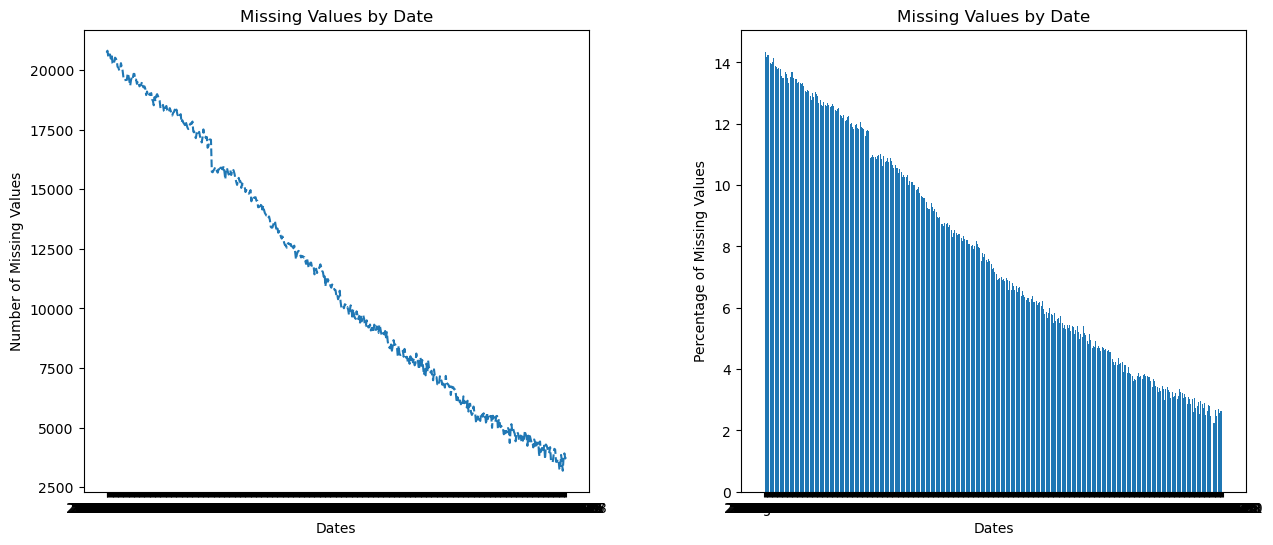

In [11]:
# Check for missing values
missing = df.iloc[:, 1:-3 ].isnull()

# Calculate the number of missing values for each date
missing_by_date = missing.sum(axis=0)
# Calculate the percentage of missing values for each date
missing_percent = (df.isnull().sum() / df.shape[0]) * 100


# Plot the missing values to visualize the distribution
# Plot the missing values as a bar plot

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121)
plt.plot(missing_by_date,linestyle='dashed')
plt.xlabel('Dates')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Date')


ax = fig.add_subplot(122)
plt.bar(missing_percent.index, missing_percent)
plt.xlabel('Dates')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values by Date')



plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

### Observations from missing values:-


- The downtrend in missing values could indicate that the number of visitors to the wiki pages has increased over time, leading to more complete data for recent dates.



- The downtrend in missing values could also suggest that the methods used to track traffic to the wiki pages have improved over time, leading to more complete data for recent dates.





- The downtrend in missing values could also be due to changes in visitor behavior, such as an increase in the number of repeat visitors or a change in the pages that visitors are interested in.

---
=============================================================================================================

## 2. Exploratory Data Analysis & Feature Engineering <a id='eda_fe'></a>

In [12]:
# Function to Extract Language from Page using Regex

import re


def get_language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 : 
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: return 'Unknown_language'

In [13]:
# Extract Language from Page using Regex


def get_language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 : 
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: return 'Unknown_language'

df['language'] = df['Page'].apply(get_language)


language_dict ={'de':'German',
                'en':'English', 
                'es': 'Spanish', 
                'fr': 'French', 
                'ja': 'Japenese' , 
                'ru': 'Russian', 
                'zh': 'Chinese',
                'Unknown_language': 'Unknown_language'}

df['language'] = df['language'].map(language_dict)


In [14]:
# Imputation of null values

df.fillna(0,inplace=True)

In [15]:
# making a copy of data

df1 = df.copy(deep=True)
df1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

### 2.1 Extracting `Language` , `Access_Type` & `Access_Origin` from `Page` <a id='lang_at'></a>

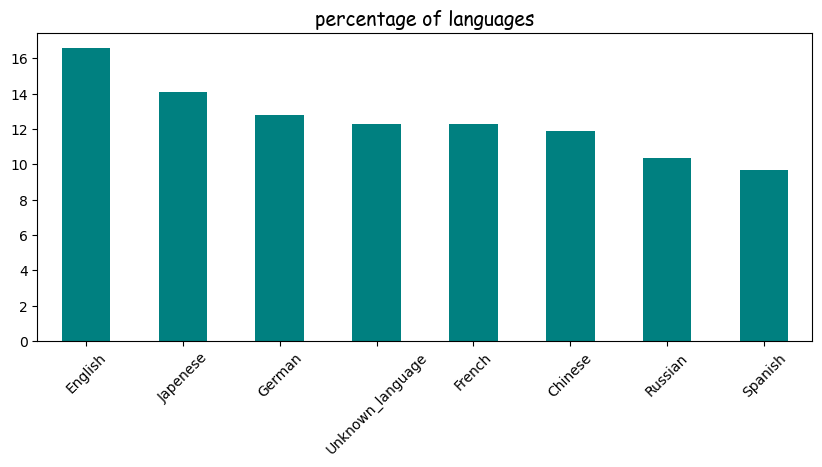

In [16]:
# Visualizing distribution of various languages

(df1.language.value_counts(normalize=True)*100).plot(kind='bar',color='teal',figsize=(10,4))
plt.title(
'percentage of languages',
fontsize=14,
fontname='Comic Sans MS')
plt.xticks(rotation=45)
plt.show()

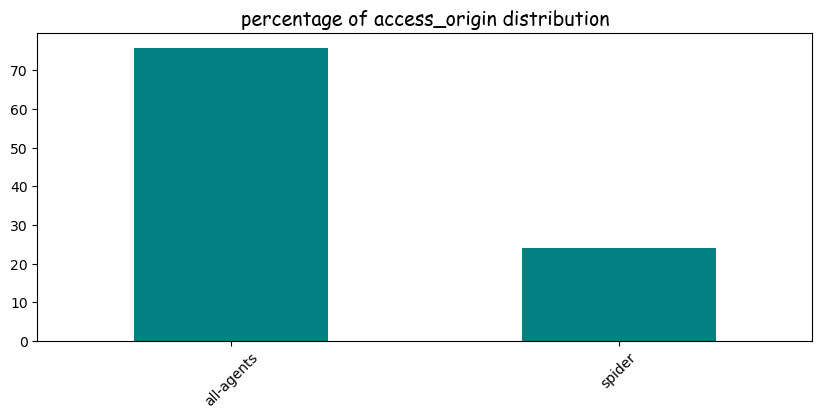

In [17]:
# Visualizing Access Origin Distribution

(df1['Page'].str.split('_').str[-1].value_counts(normalize=True)*100).plot(kind='bar',color='teal',figsize=(10,4))
plt.title(
'percentage of access_origin distribution',
fontsize=14,
fontname='Comic Sans MS')
plt.xticks(rotation=45)
plt.show()

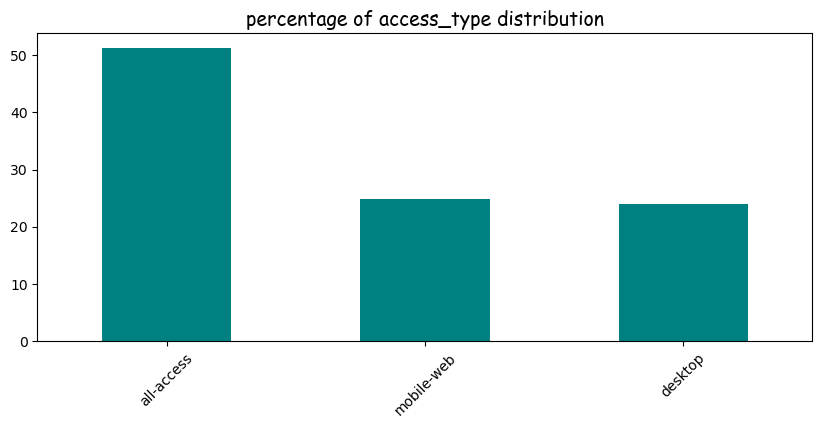

In [18]:
# Visualizing Access types Distribution

(df1['Page'].str.split('_').str[-2].value_counts(normalize=True)*100).plot(kind='bar',color='teal',figsize=(10,4))
plt.title(
'percentage of access_type distribution',
fontsize=14,
fontname='Comic Sans MS')
plt.xticks(rotation=45)
plt.show()

=============================================================================================================

# 3. Data Pre-processing <a id='pre_process'></a>

## 3.1 Creating dataframe: mean page visit per language <a id='mean_visit'></a>

In [19]:
df1 = df1.groupby('language').mean().T

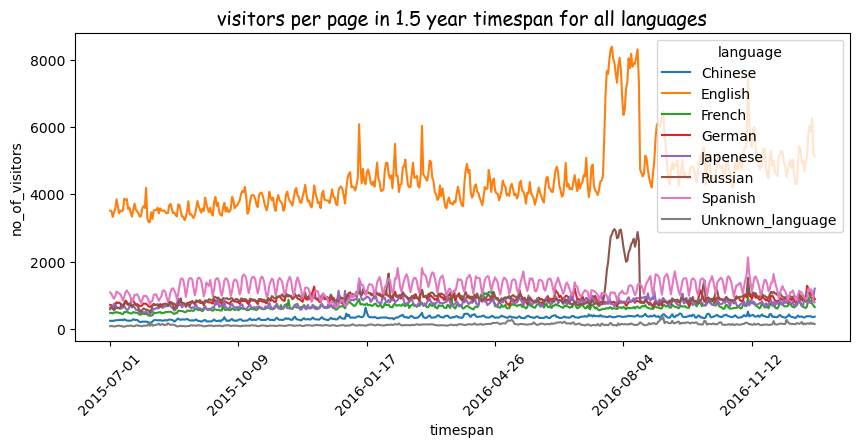

In [20]:
df1.plot(figsize=(10,4))
plt.title(
'visitors per page in 1.5 year timespan for all languages',
fontsize=14,
fontname='Comic Sans MS')
plt.xticks(rotation=45)
plt.xlabel('timespan')
plt.ylabel('no_of_visitors')
plt.show()

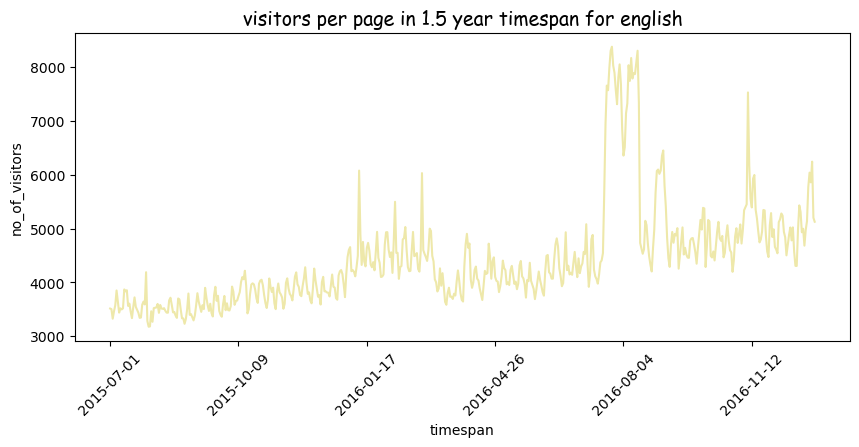

In [21]:
df1.English.plot(figsize=(10,4),color='palegoldenrod')
plt.title(
'visitors per page in 1.5 year timespan for english',
fontsize=14,
fontname='Comic Sans MS')
plt.xticks(rotation=45)
plt.xlabel('timespan')
plt.ylabel('no_of_visitors')
plt.show()

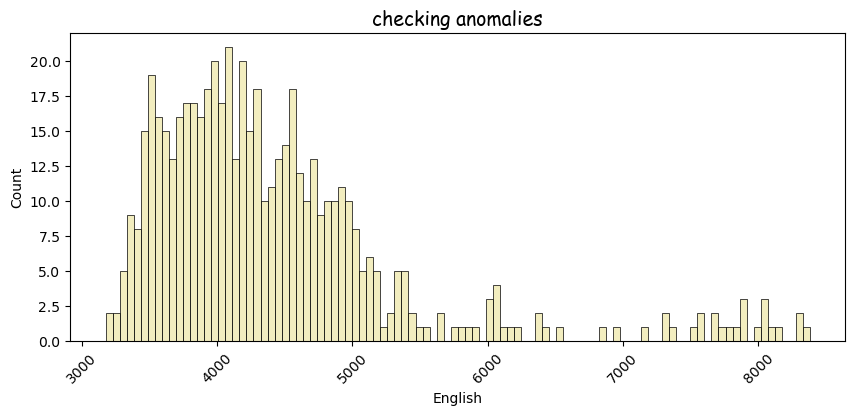

In [22]:
# checking hisplot for outliers 

plt.figure(figsize=(10,4))
sns.histplot(df1.English, bins=100, color='palegoldenrod')
plt.title(
'checking anomalies',
fontsize=14,
fontname='Comic Sans MS')

plt.xticks(rotation=45)

plt.show()

In [23]:
eng_ts_df = df1.English.clip(upper=df1.English.quantile(.97),lower=df1.English.quantile(0))

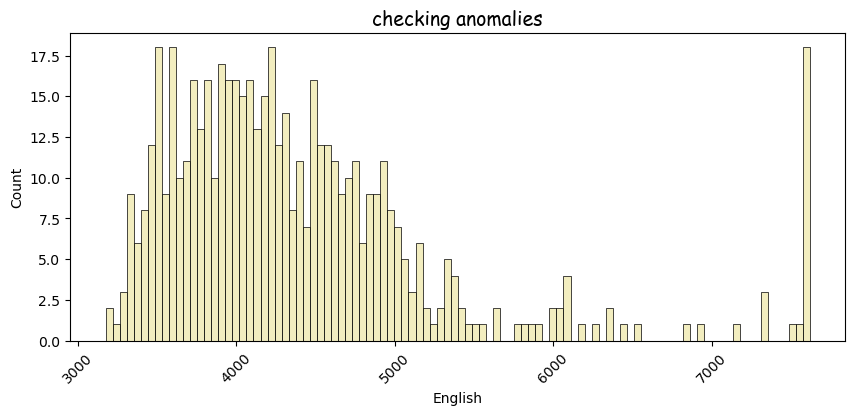

In [24]:
# checking hisplot for outliers 

plt.figure(figsize=(10,4))
sns.histplot(eng_ts_df, bins=100, color='palegoldenrod')
plt.title(
'checking anomalies',
fontsize=14,
fontname='Comic Sans MS')

plt.xticks(rotation=45)

plt.show()

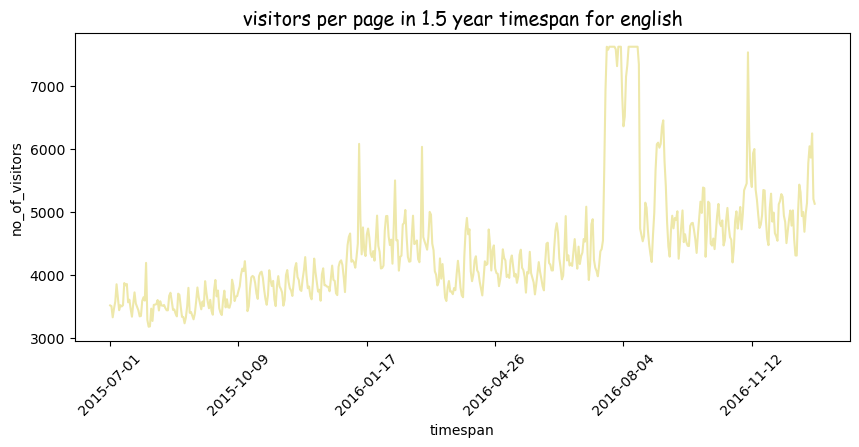

In [25]:
eng_ts_df.plot(figsize=(10,4),color='palegoldenrod')
plt.title(
'visitors per page in 1.5 year timespan for english',
fontsize=14,
fontname='Comic Sans MS')
plt.xticks(rotation=45)
plt.xlabel('timespan')
plt.ylabel('no_of_visitors')
plt.show()

## Moving average

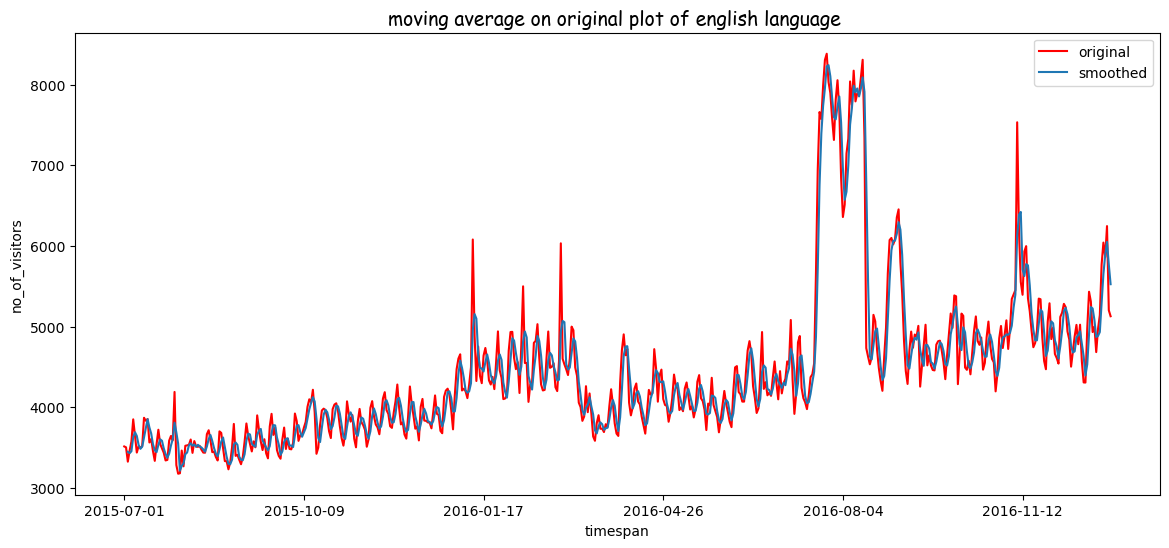

In [26]:
df1.English.plot(label='original',figsize=(14,6),color='r')

df1.English.rolling(3,center=False).mean().plot(label='smoothed',figsize=(14,6))
plt.title(
'moving average on original plot of english language ',
fontsize=14,
fontname='Comic Sans MS')
plt.xlabel('timespan')
plt.ylabel('no_of_visitors')
plt.legend()
plt.show()


# Decomposition

## Additive Decomposition :

In [27]:
ets_df = pd.DataFrame(df1.English).reset_index()
ets_df['index'] = ets_df['index'].astype('datetime64')
ets_df = ets_df.set_index('index')
ets_df

,English
index,
2015-07-01,3513.862203
2015-07-02,3502.511407
2015-07-03,3325.357889
2015-07-04,3462.054256
2015-07-05,3575.520035
...,...
2016-12-27,6040.680728
2016-12-28,5860.227559
2016-12-29,6245.127510


In [28]:
import statsmodels.api as sm


model = sm.tsa.seasonal_decompose(ets_df,model='additive')

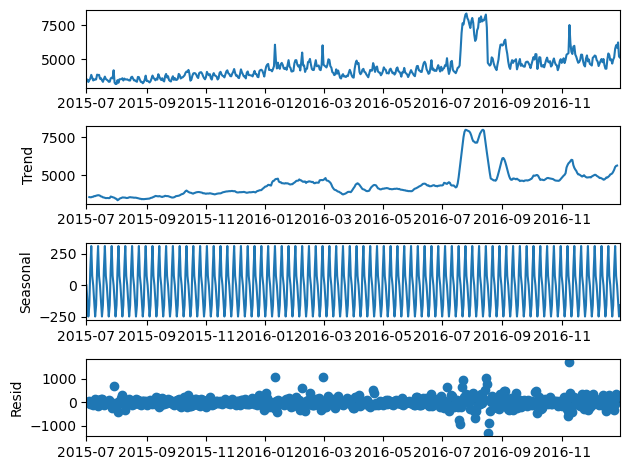

In [29]:
model.plot();

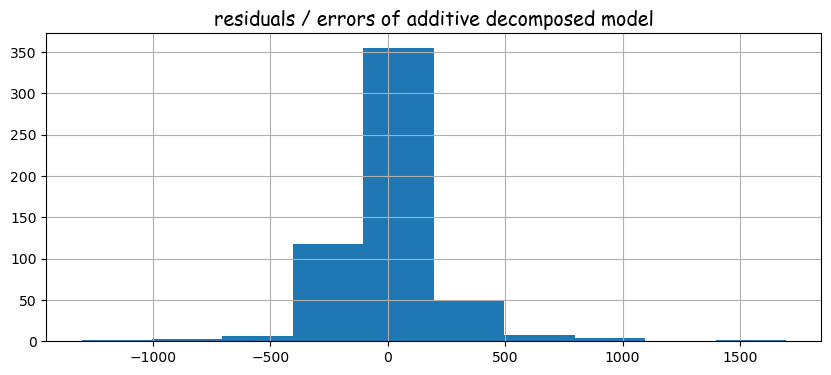

In [30]:
model.resid.hist(figsize=(10,4))
plt.title(
'residuals / errors of additive decomposed model',
fontsize=14,
fontname='Comic Sans MS')

plt.show()

In [31]:
model.resid.mean()

-0.12496675034106479

**relative to my data range i.e. from 3000 - 7000 my error i.e. - 0.12496675034106479 is very small**

---
## Multiplicative Decomposition :

In [32]:
model1 = sm.tsa.seasonal_decompose(ets_df,model='multiplicative')

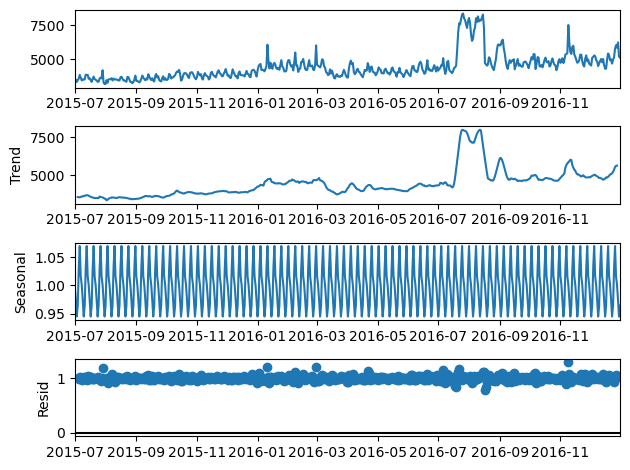

In [33]:
model1.plot();

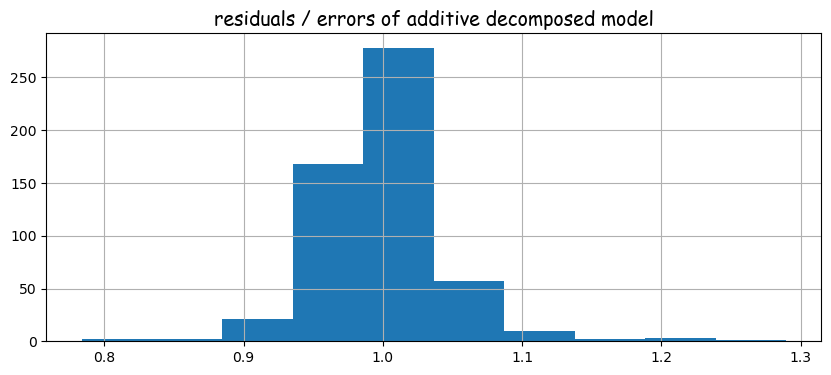

In [34]:
model1.resid.hist(figsize=(10,4))
plt.title(
'residuals / errors of additive decomposed model',
fontsize=14,
fontname='Comic Sans MS')

plt.show()

In [35]:
model1.resid.mean()

0.9993901924949811

**relative to my data range i.e. from 3000 - 7000 my error i.e. 0.9993901924949811 is very small**

---
***FUN FACT : Multiplicative decomposition can be done simply by taking log of additive decomposition i.e. log(x(t)) = log(b(t)) + log(s(t)) + log(e(t))***

---

--------------------------------------------------

# 4. Checking Stationarity using ADF (Augmented Dickey Fuller) Test <a id='adfuller'></a>

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
print('Critical values for the test statistic at the 1 %, 5 %, and 10 % levels')
adfuller(df1.English)[4]

Critical values for the test statistic at the 1 %, 5 %, and 10 % levels


{'1%': -3.4426321555520905,
 '5%': -2.86695748394138,
 '10%': -2.5696553279762426}

In [38]:
test_statistic = adfuller(df1.English)[0]
pvalue = adfuller(df1.English)[1]

print(f"test statistics : {test_statistic} || p_value : {pvalue}")

test statistics : -2.247284005744681 || p_value : 0.18953359279992382


- **The test statistic > critical value / p_value > 5%.**
- **This implies that the series is not stationary.**

## Detrending
---

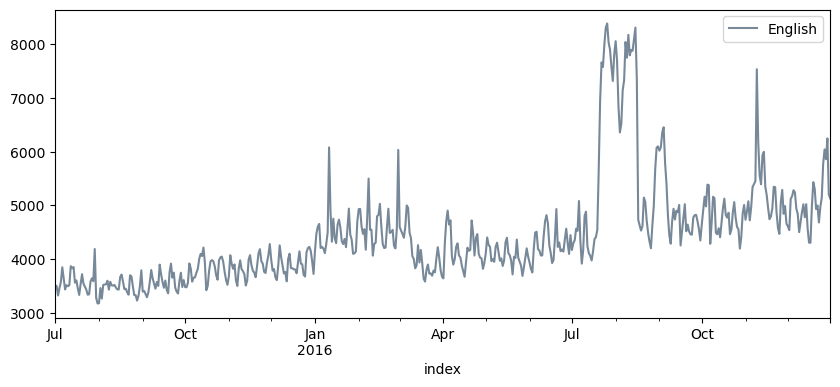

In [39]:
ets_df.plot(figsize=(10,4),color='lightslategrey');

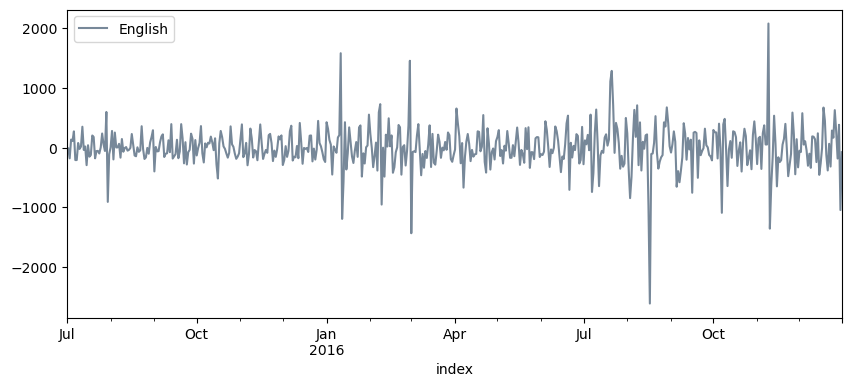

In [40]:
detrended = ets_df.diff()
detrended.plot(figsize=(10,4),color='lightslategrey');

In [41]:
pd.options.display.float_format = '{:.2f}'.format
adfuller(detrended.dropna())[1]


5.292474635436557e-13

- **The p_value < 5%.**
- **This implies that the series is stationary.**

==> **After one differencing time-series becomes stationary. This indicates for ARIMA model, we can set d = 1.**

# ACF & PACF
---

In [42]:
lag = 1
np.corrcoef(df1.English[lag:],df1.English.shift(lag)[lag:])[0][1]

0.9363434527458432

Autocorrelation on normal series 



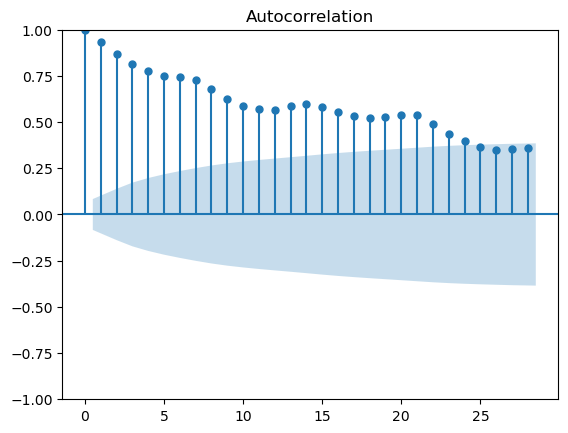

Autocorrelation on detrended series 



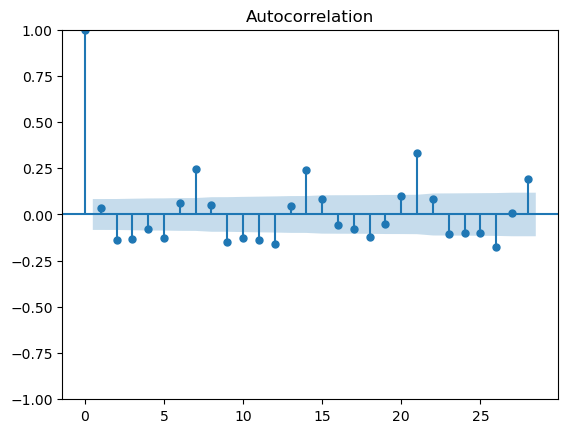

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
print('Autocorrelation on normal series','\n')
plot_acf(df1.English);
plt.show()
print('Autocorrelation on detrended series','\n')
plot_acf(df1.English.diff().dropna());




**from above plot we can clearly visualize m**

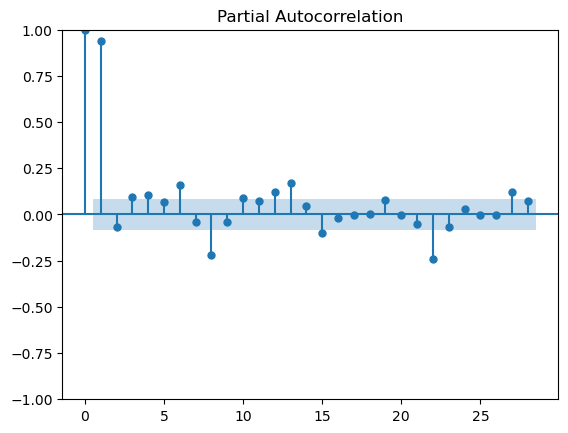

In [44]:
plot_pacf(df1.English);

# Model Building

In [45]:
# Threshold for training and testing

train_max_date = df1.English.index[-184]

In [46]:
# create model ready dataset

train_max_date = df1.English.index[-184]
data = df1.English
train_x = df1.English.loc[df1.English.index < train_max_date].copy()
test_x = df1.English.loc[df1.English.index >= train_max_date].copy()
test_x = pd.DataFrame(test_x)
train_x = pd.DataFrame(train_x)

In [47]:
# import metrics 

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

## Simple mean model

MAE : 1334.013
RMSE : 1735.767
MAPE: 22.398


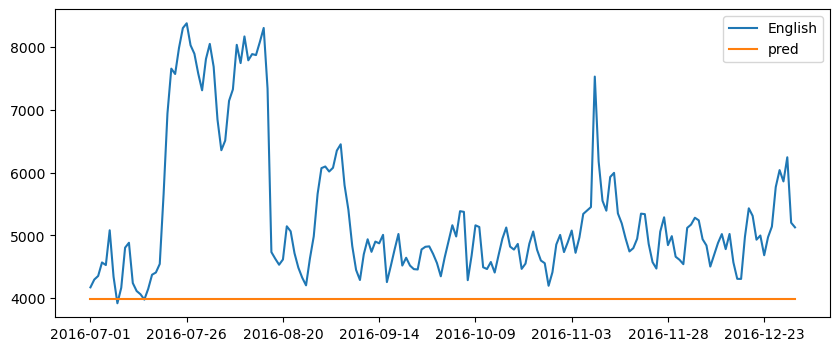

In [48]:
# train mean as test predicted


test_x['pred'] = train_x.English.mean()

test_x.plot(style='-',figsize = (10,4))

performance(test_x['English'], test_x['pred'])

## Naive forcasts

MAE : 923.27
RMSE : 1411.967
MAPE: 14.633


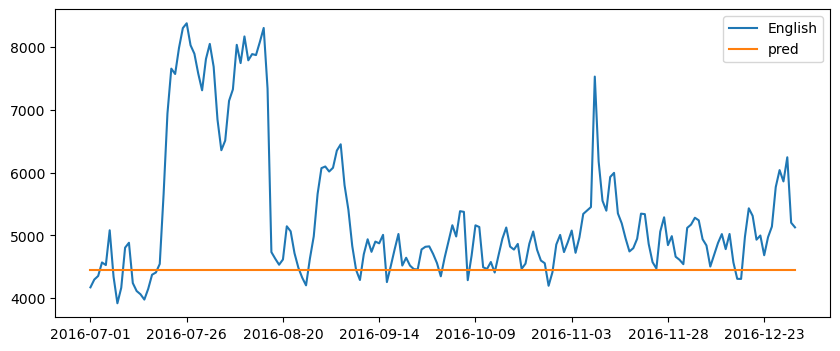

In [49]:
## Last value as the value at all future values: high variance model
test_x['pred'] = train_x['English'][-1]

test_x.plot(style='-',figsize = (10,4))

performance(test_x['English'], test_x['pred'])

## Simple Drift Model

MAE : 782.491
RMSE : 1319.811
MAPE: 12.089


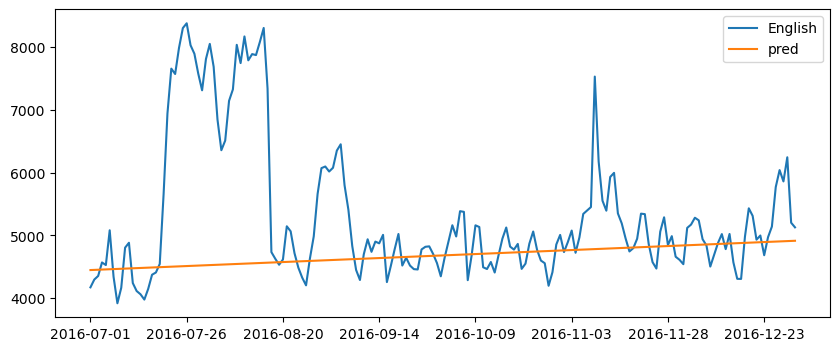

In [50]:
# Get the slope
y_t = train_x['English'][-1]
m = (y_t - train_x['English'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-',figsize = (10,4))

performance(test_x['English'], test_x['pred'])

## Moving Average Forcast

MAE : 1122.185
RMSE : 1500.137
MAPE: 18.826


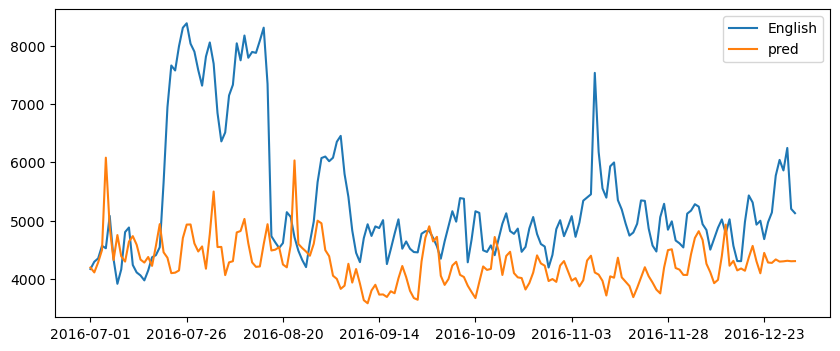

In [51]:
df = train_x.copy()

df = df.append(pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=12,freq='MS')[1:]))

pred = df.English.dropna().values 

for i in range(8):
    pred = np.append(pred, pred[-3:].mean()) ##MA of window-length=3

test_x['pred'] = pred[-184:]
test_x.plot(style='-',figsize = (10,4))
performance(test_x['English'], test_x['pred'])

# Exponential Smoothing

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


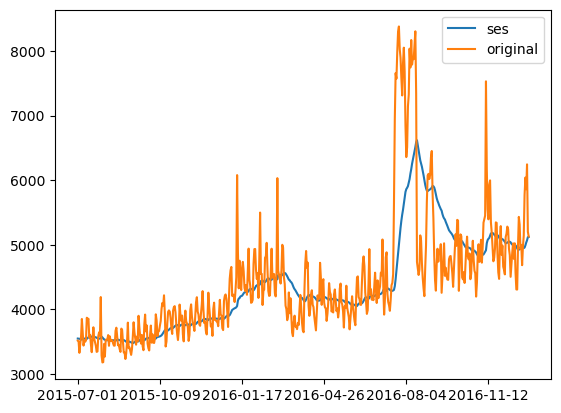

In [52]:
import statsmodels.api as sm
model = pd.Series(sm.tsa.SimpleExpSmoothing(df1.English).fit(smoothing_level=1/(2*12)).fittedvalues)

model.plot(label='ses')
df1.English.plot(label='original')
plt.legend()

In [53]:
# train_test_split for timeseries

time_series = df1.English

train_data = time_series[:int(0.9 * len(time_series))]
test_data = time_series[int(0.9 * len(time_series)):]





from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


# ARIMA Model

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--------------------------------------------------------------------------------
MAE: 464.0868947275943
--------------------------------------------------------------------------------
MAPE: 9.110438458440132
--------------------------------------------------------------------------------
RMSE: 591.9029946380286
--------------------------------------------------------------------------------


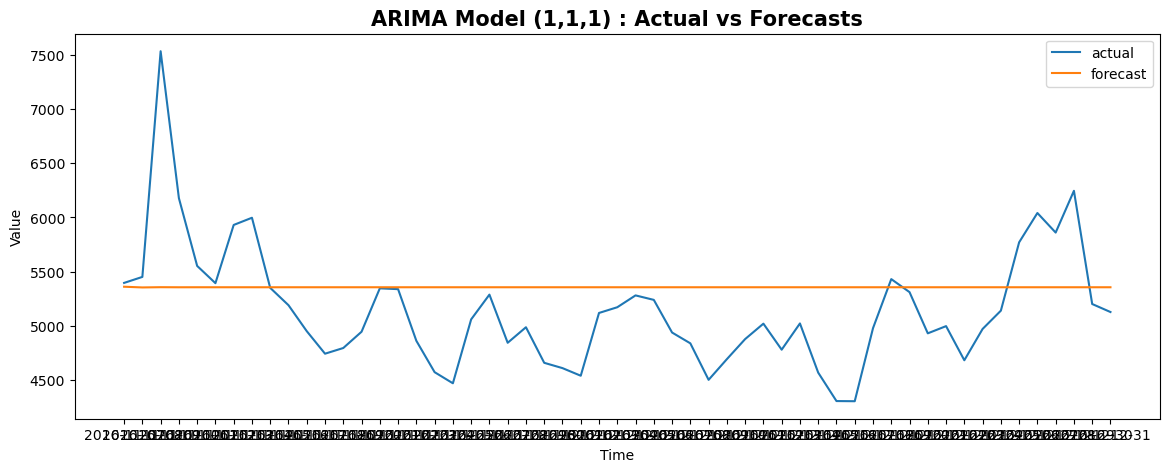

In [54]:
# from statsmodels.tsa.arima_model import ARIMA


model_arima = ARIMA(train_data,order=(1,1,1))
model_arima = model_arima.fit()
# Forecast the future values
forecast = model_arima.forecast(steps=len(test_data))
predictions_arima = model_arima.predict(start=len(train_data), end=len(train_data)+164, typ='levels')


# Calculate the mean absolute error (MAE) between the predicted and actual values
# forecast = forecast.reshape(-1,)
print('-'*80)
mae = np.mean(np.abs(forecast - test_data.values))
print("MAE:", mae)
# Calculate the mean absolute percentage error (MAPE) between the predicted and actual values
print('-'*80)
mape = np.mean(np.abs((forecast - test_data.values) / test_data.values)) * 100
print("MAPE:", mape)

# Calculate the root mean squared error (RMSE) between the predicted and actual values
print('-'*80)
rmse = np.sqrt(np.mean((forecast - test_data.values)**2))
print("RMSE:", rmse)
print('-'*80)

# Plot the actual and forecasted values
plt.figure(figsize=(14,5))
plt.plot(test_data.index, test_data.values, label='actual')
plt.plot(test_data.index, forecast, label='forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'ARIMA Model ({1},{1},{1}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')

plt.legend()
plt.show()

# SARIMAX Model

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):
    
    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s) 
    model = SARIMAX(time_series[:-n], \
                    order =(p,d,q), 
                    seasonal_order=(P, D, Q, s), 
                    exog = exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()
    
    #Creating forecast for last n-values
    model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))
    
    #plotting Actual & Forecasted values
    time_series.index = time_series.index.astype('datetime64[ns]')
    model_forecast.index = model_forecast.index.astype('datetime64[ns]')
    plt.figure(figsize = (20,8))
    time_series[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'red', 
                              linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
    plt.show()
    
    #Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print('-'*80)
    print(f'MAPE of Model : {np.round(mape,5)*100}')
    print('-'*80)
    print(f'RMSE of Model : {np.round(rmse,3)}')
    print('-'*80)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


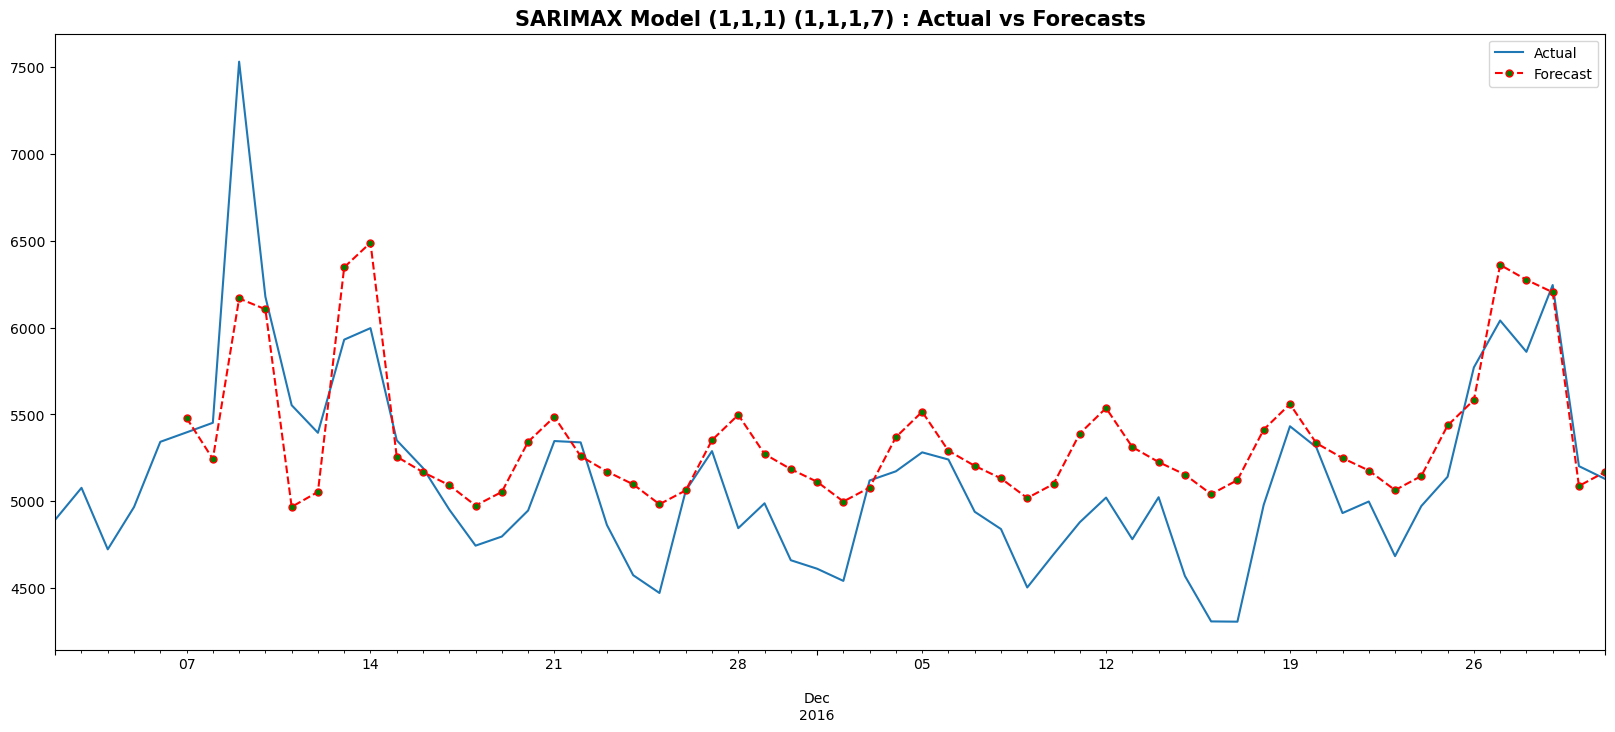

--------------------------------------------------------------------------------
MAPE of Model : 6.367000000000001
--------------------------------------------------------------------------------
RMSE of Model : 404.502
--------------------------------------------------------------------------------


In [56]:
exog = exo['Exog'].to_numpy()
time_series = df1.English
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = int(len(df1.English)- len(df1.English)*.9 ) 
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

In [ ]:
train_data = pd.DataFrame(train_data).reset_index().rename(columns={'index':'date'})
train_data['date'] = train_data['date'].astype('datetime64')
train_data = train_data.set_index('date')

In [82]:
def sarimax_grid_search(time_series, n, param, d_param, s_param, exog = []):
    counter = 0
    #creating df for storing results summary
    param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
    
    #Creating loop for every paramater to fit SARIMAX model
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                #Creating Model
                                model = SARIMAX(time_series[:-n], 
                                                order=(p,d,q), 
                                                seasonal_order=(P, D, Q, s), 
                                                exog = exog[:-n],
                                                initialization='approximate_diffuse')
                                model_fit = model.fit()
                                
                                #Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))
                                
                                #Calculating errors for results
                                actuals = time_series.values[-n:]
                                errors = time_series.values[-n:] - model_forecast.values
                                
                                #Calculating MAPE & RMSE
                                mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                rmse = np.sqrt(np.mean(errors**2))
                                mape = np.round(mape,5)
                                rmse = np.round(rmse,3)
                                
                                #Storing the results in param_df
                                counter += 1
                                list_row = [counter, (p,d,q), (P,D,Q,s), mape, rmse]
                                param_df.loc[len(param_df)] = list_row
                                
                #print statement to check progress of Loop                
                print(f'Possible Combination: {counter} out of { (len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')
                           
    return param_df   

In [100]:
import warnings
warnings.filterwarnings('ignore')

#long time to execute
#Finding best parameters for English time series

exog = exo['Exog'].to_numpy()[:len(train_data)]
time_series = train_data
n = 30 
param = [0,1,2]
d_param = [0,1]
s_param = [7]

english_params  = sarimax_grid_search(time_series, n, param, d_param,s_param, exog)

Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculated
Possible Combination: 324 out of 324 calculated


In [101]:
english_params.sort_values(['mape', 'rmse']).head()

,serial,pdq,PDQs,mape,rmse
156,157,"(1, 0, 2)","(2, 0, 0, 7)",0.05,271.96
157,158,"(1, 0, 2)","(2, 0, 1, 7)",0.05,275.53
151,152,"(1, 0, 2)","(1, 0, 1, 7)",0.05,273.88
241,242,"(2, 0, 1)","(1, 0, 1, 7)",0.05,271.01
146,147,"(1, 0, 2)","(0, 0, 2, 7)",0.05,273.93


In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     495 non-null    datetime64[ns]
 1   English  495 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the time series data
# data = pd.read_csv('data.csv')

# Split the data into training and validation sets
# train_data = data[:-12]
val_data = test_data.copy()

# Define the hyperparameters and their respective values to be tuned
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]
P_values = [0, 1, 2]
D_values = [0, 1, 2]
Q_values = [0, 1, 2]
s_values = [12]

best_score = np.inf
best_params = None

# Loop over the hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            try:
                                # Fit the SARIMAX model to the training data
                                model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
                                model = model.fit()

                                # Make predictions on the validation set
                                predictions = model.predict(start=len(train_data), end=len(train_data) + len(val_data) - 1)

                                # Evaluate the performance of the model
                                score = mean_squared_error(val_data, predictions)

                                # Save the best hyperparameters
                                if score < best_score:
                                    best_score = score
                                    best_params = (p, d, q, P, D, Q, s)
                            except:
                                continue

# Fit the SARIMAX model to the entire data using the best hyperparameters
model = SARIMAX(data, order=best_params[:3], seasonal_order=best_params[3:])
model = model.fit()

# Use the fitted model for predictions on new data
future_predictions = model.predict(start=len(data), end=len(data) + 12)

In [64]:
type(train_data.values)

numpy.ndarray

# Pipeline function

In [106]:
#Function to fetch best parameters for each language

def pipeline_sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param):
    
    best_param_df  = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s','mape'])
    for lang in languages:
        print('')
        print('')
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')
        counter = 0
        time_series = data_language[lang]
        #creating df for storing results summary
        #param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
        best_mape = 100
        
        #Creating loop for every paramater to fit SARIMAX model
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    #Creating Model
                                    model = SARIMAX(time_series[:-n], 
                                                    order=(p,d,q), 
                                                    seasonal_order=(P, D, Q, s), 
                                                    initialization='approximate_diffuse')
                                    model_fit = model.fit()

                                    #Creating forecast from Model
                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actuals = time_series.values[-n:]
                                    errors = time_series.values[-n:] - model_forecast.values

                                    #Calculating MAPE & RMSE
                                    mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                    
                                    counter += 1

                                    if (mape < best_mape):
                                        best_mape = mape
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass

                    #print statement to check progress of Loop                
                    print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')
        
        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        best_param_df.loc[len(best_param_df)] = best_param_row                
                           
    return best_param_df     

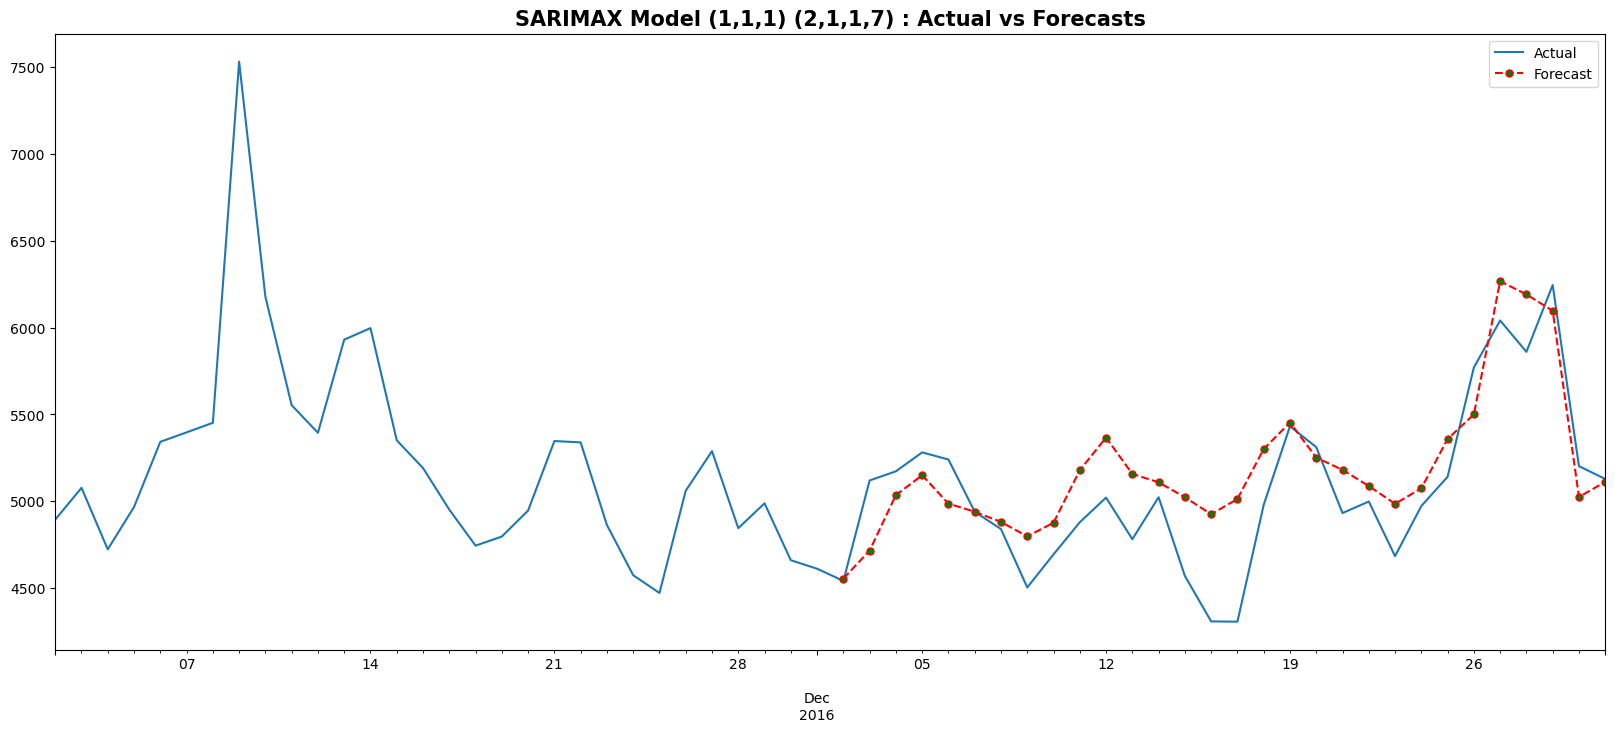

--------------------------------------------------------------------------------
MAPE of Model : 4.681
--------------------------------------------------------------------------------
RMSE of Model : 285.366
--------------------------------------------------------------------------------


In [107]:
#Plotting the SARIMAX model corresponding to best parameters
exog = exo['Exog'].to_numpy()
time_series = df1.English
p,d,q, P,D,Q,s = 1,1,1, 2,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

In [112]:
df1.columns

Index(['Chinese', 'English', 'French', 'German', 'Japenese', 'Russian',
       'Spanish', 'Unknown_language'],
      dtype='object', name='language')

In [113]:
df2 = df1[['Chinese', 'English', 'French', 'German', 'Japenese', 'Russian',
       'Spanish']]

In [114]:
#long time to execute
#calculating best parameters for all languages
languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30 
param = [0,1,2]
d_param = [0,1]
s_param = [7]


best_param_df = pipeline_sarimax_grid_search_without_exog(languages, df2, n, param, d_param, s_param)



--------------------------------------------------------------
          Finding best parameters for Chinese                  
--------------------------------------------------------------
Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculat

In [115]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,0,1,0,1,0,2,7,0.03
4,Russian,0,0,2,1,0,1,7,0.04
1,French,0,0,2,2,1,2,7,0.06
2,German,0,1,1,1,0,1,7,0.07
3,Japenese,0,1,2,2,1,0,7,0.07
5,Spanish,0,1,0,2,1,0,7,0.09


In [116]:
#Function to plot SARIMAX model for each Language

def plot_best_SARIMAX_model(languages, data_language, n, best_param_df):
    
    for lang in languages:
        #fetching respective best parameters for that language
        p = best_param_df.loc[best_param_df['language'] == lang, ['p']].values[0][0]
        d = best_param_df.loc[best_param_df['language'] == lang, ['d']].values[0][0]
        q = best_param_df.loc[best_param_df['language'] == lang, ['q']].values[0][0]
        P = best_param_df.loc[best_param_df['language'] == lang, ['P']].values[0][0]
        D = best_param_df.loc[best_param_df['language'] == lang, ['D']].values[0][0]
        Q = best_param_df.loc[best_param_df['language'] == lang, ['Q']].values[0][0]
        s = best_param_df.loc[best_param_df['language'] == lang, ['s']].values[0][0]
        
        #Creating language time-series
        time_series = data_language[lang]
        
        #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s) 
        model = SARIMAX(time_series[:-n], 
                        order =(p,d,q), 
                        seasonal_order=(P, D, Q, s),
                        initialization='approximate_diffuse')
        model_fit = model.fit()
        
        #Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic = True)
        
        #Calculating MAPE & RMSE
        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values

        mape = np.mean(np.abs(errors)/ np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))
        
        print('')
        print('')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'        SARIMAX model for {lang} Time Series                                             ')
        print(f'        Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})                            ')
        print(f'        MAPE of Model       : {np.round(mape,5)}                                         ')
        print(f'        RMSE of Model       : {np.round(rmse,3)}                                         ')
        print(f'-----------------------------------------------------------------------------------------')
        
        #plotting Actual & Forecasted values
        time_series.index = time_series.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize = (20,8))
        time_series[-60:].plot(label = 'Actual')
        model_forecast[-60:].plot(label = 'Forecast', color = 'red', 
                                  linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
        plt.show()
    
    return 0



-----------------------------------------------------------------------------------------
        SARIMAX model for Chinese Time Series                                             
        Parameters of Model : (0,1,0) (1,0,2,7)                            
        MAPE of Model       : 0.03074                                         
        RMSE of Model       : 14.487                                         
-----------------------------------------------------------------------------------------


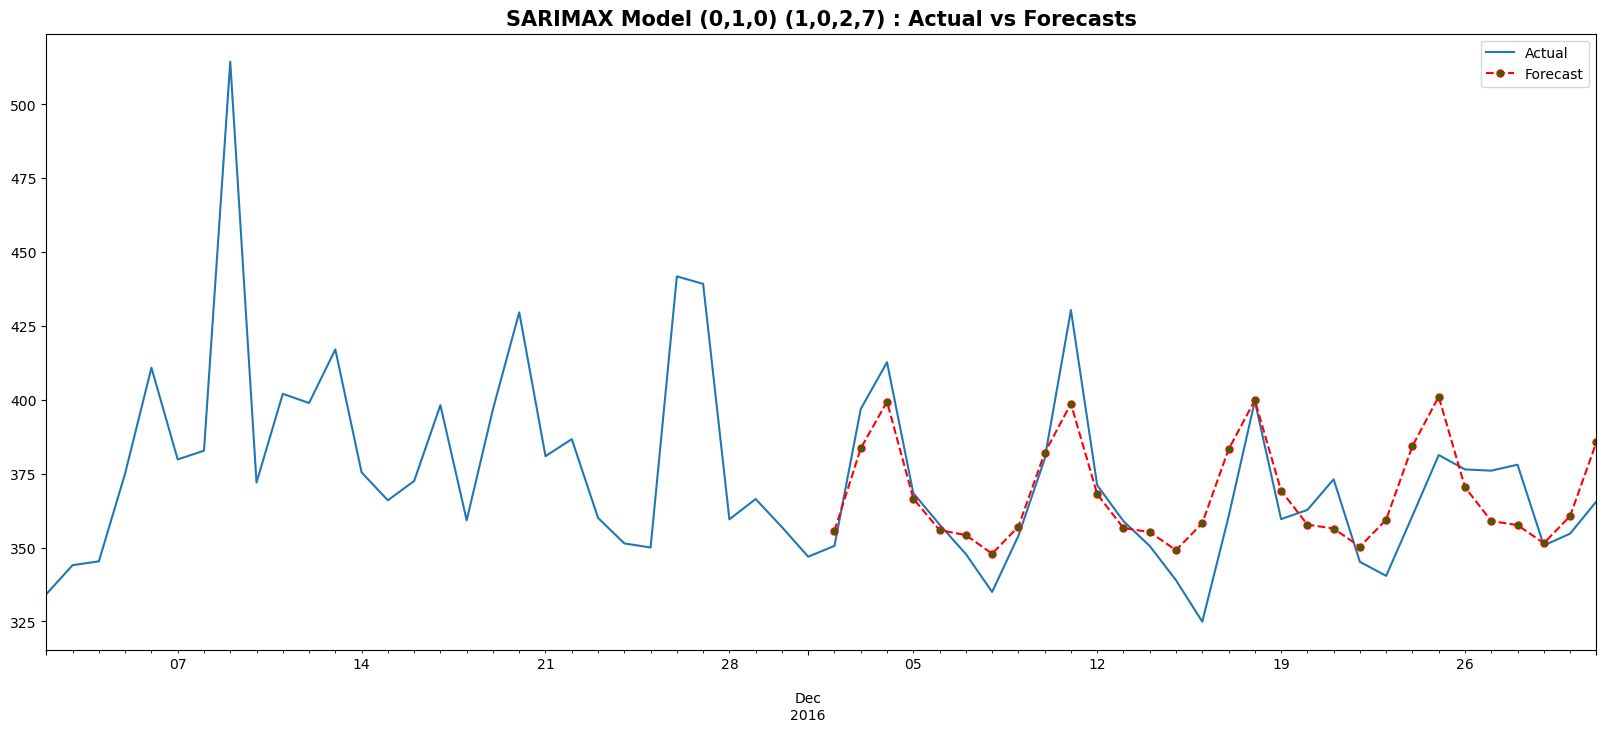



-----------------------------------------------------------------------------------------
        SARIMAX model for French Time Series                                             
        Parameters of Model : (0,0,2) (2,1,2,7)                            
        MAPE of Model       : 0.06361                                         
        RMSE of Model       : 72.602                                         
-----------------------------------------------------------------------------------------


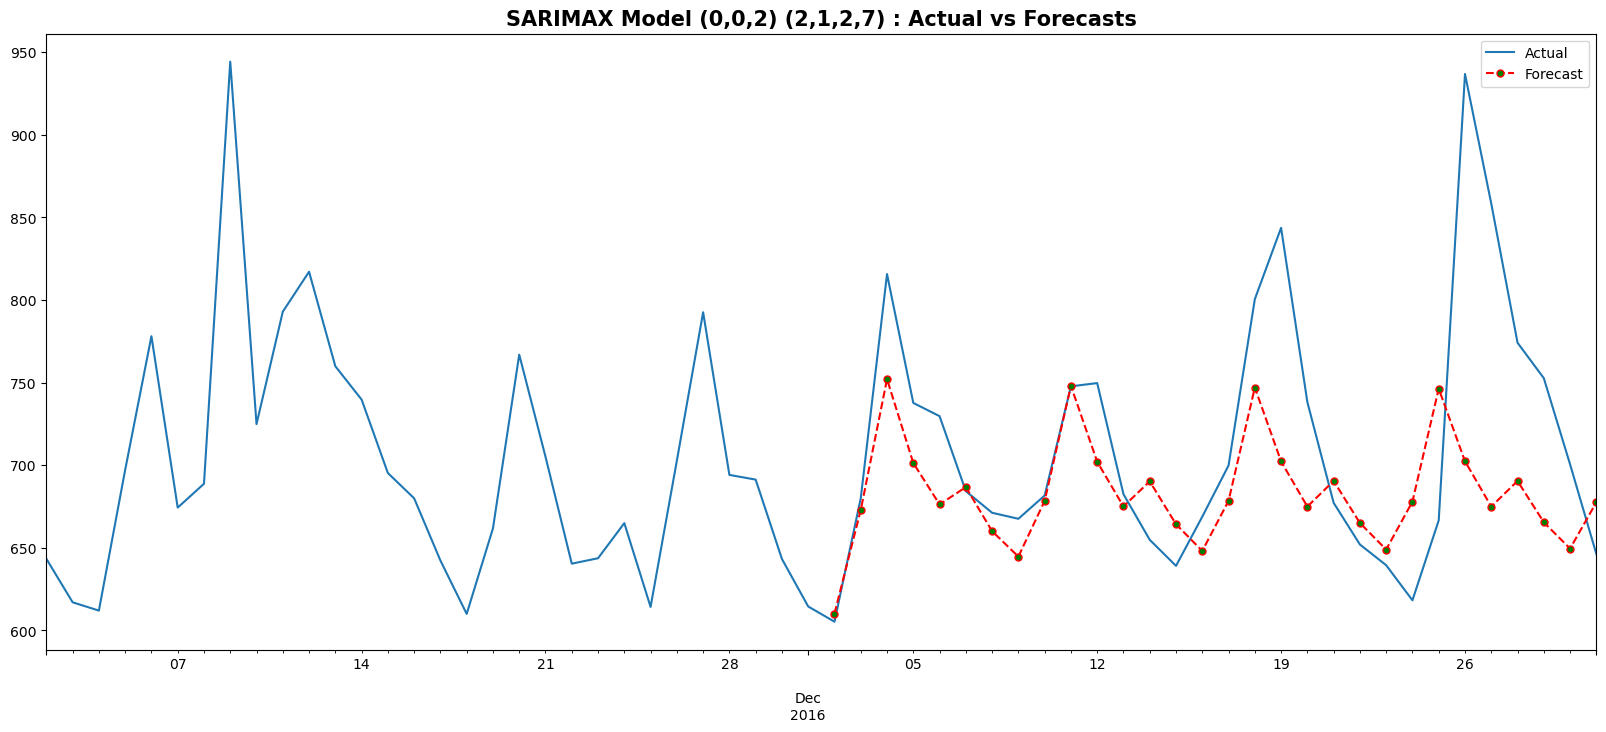



-----------------------------------------------------------------------------------------
        SARIMAX model for German Time Series                                             
        Parameters of Model : (0,1,1) (1,0,1,7)                            
        MAPE of Model       : 0.06578                                         
        RMSE of Model       : 110.621                                         
-----------------------------------------------------------------------------------------


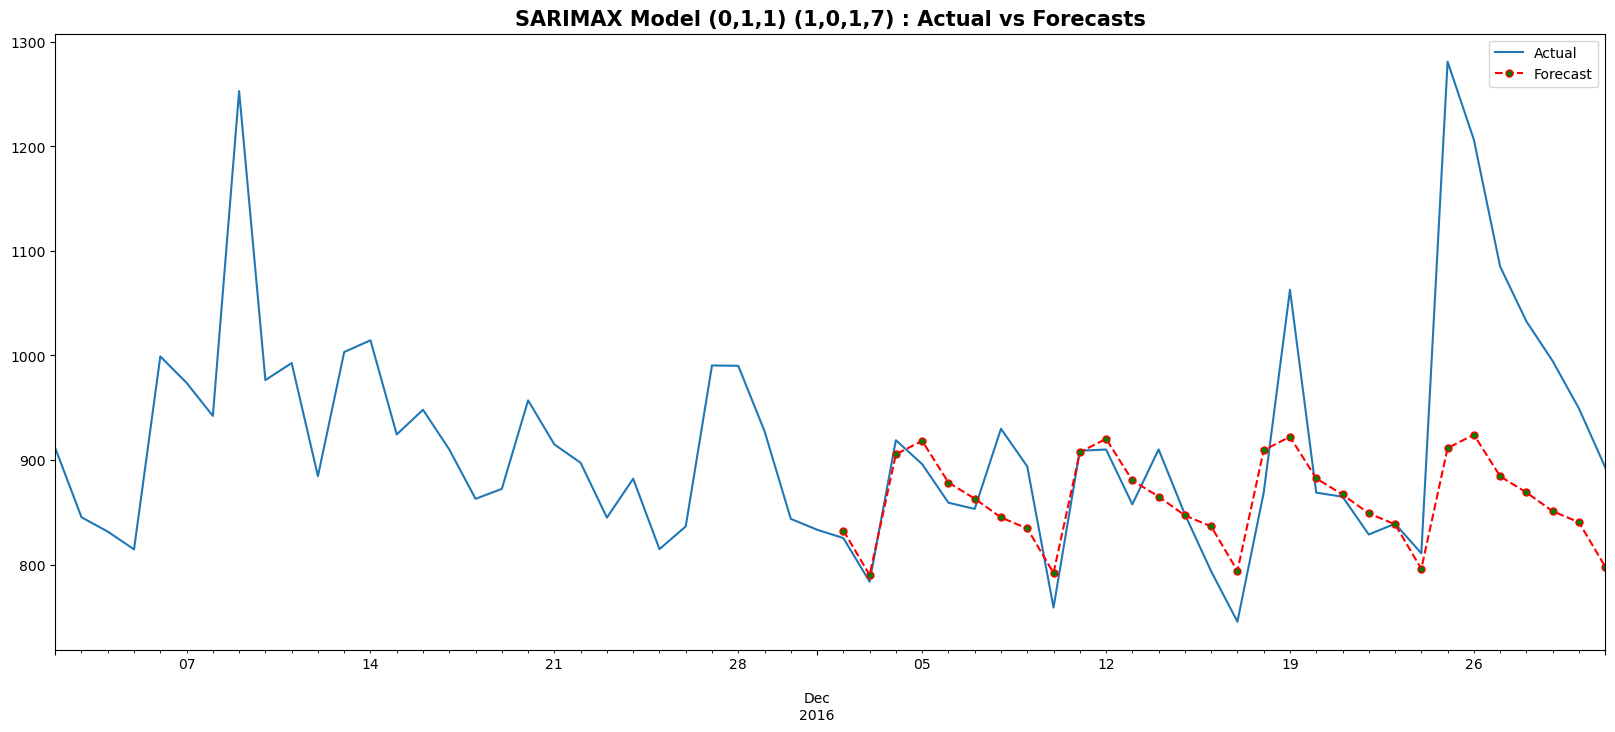



-----------------------------------------------------------------------------------------
        SARIMAX model for Japenese Time Series                                             
        Parameters of Model : (0,1,2) (2,1,0,7)                            
        MAPE of Model       : 0.07122                                         
        RMSE of Model       : 90.833                                         
-----------------------------------------------------------------------------------------


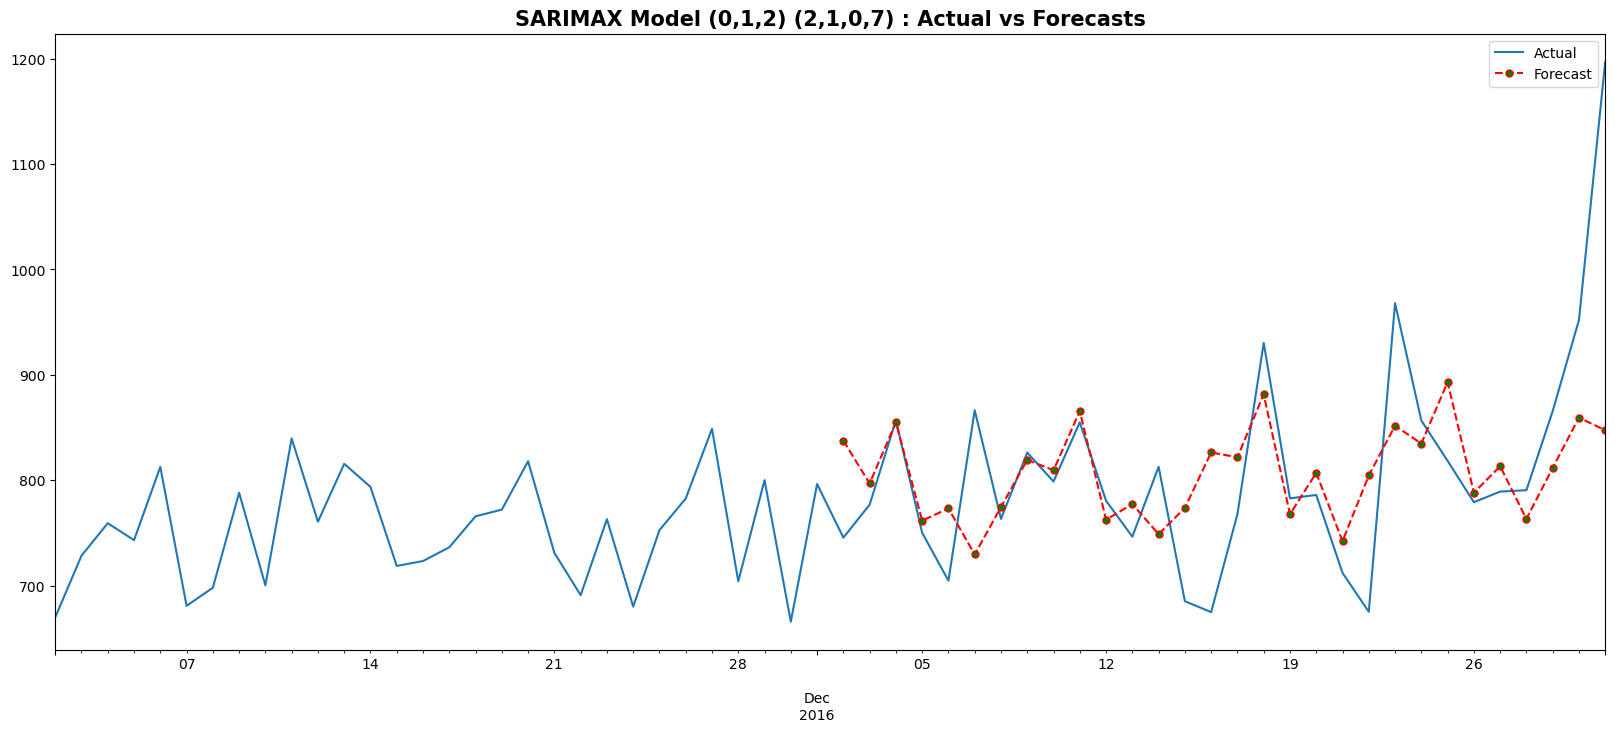



-----------------------------------------------------------------------------------------
        SARIMAX model for Russian Time Series                                             
        Parameters of Model : (0,0,2) (1,0,1,7)                            
        MAPE of Model       : 0.04286                                         
        RMSE of Model       : 53.031                                         
-----------------------------------------------------------------------------------------


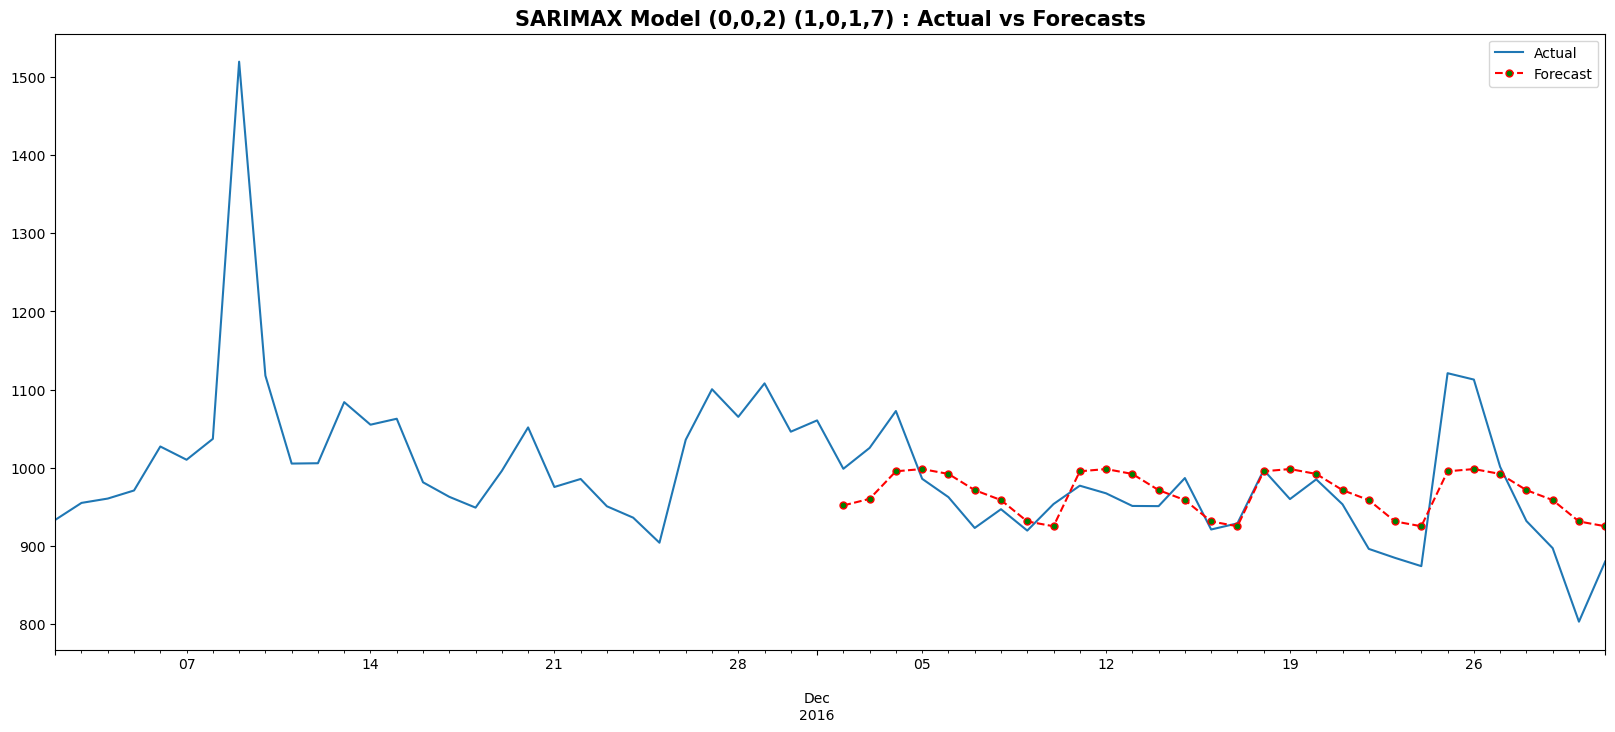



-----------------------------------------------------------------------------------------
        SARIMAX model for Spanish Time Series                                             
        Parameters of Model : (0,1,0) (2,1,0,7)                            
        MAPE of Model       : 0.08561                                         
        RMSE of Model       : 109.03                                         
-----------------------------------------------------------------------------------------


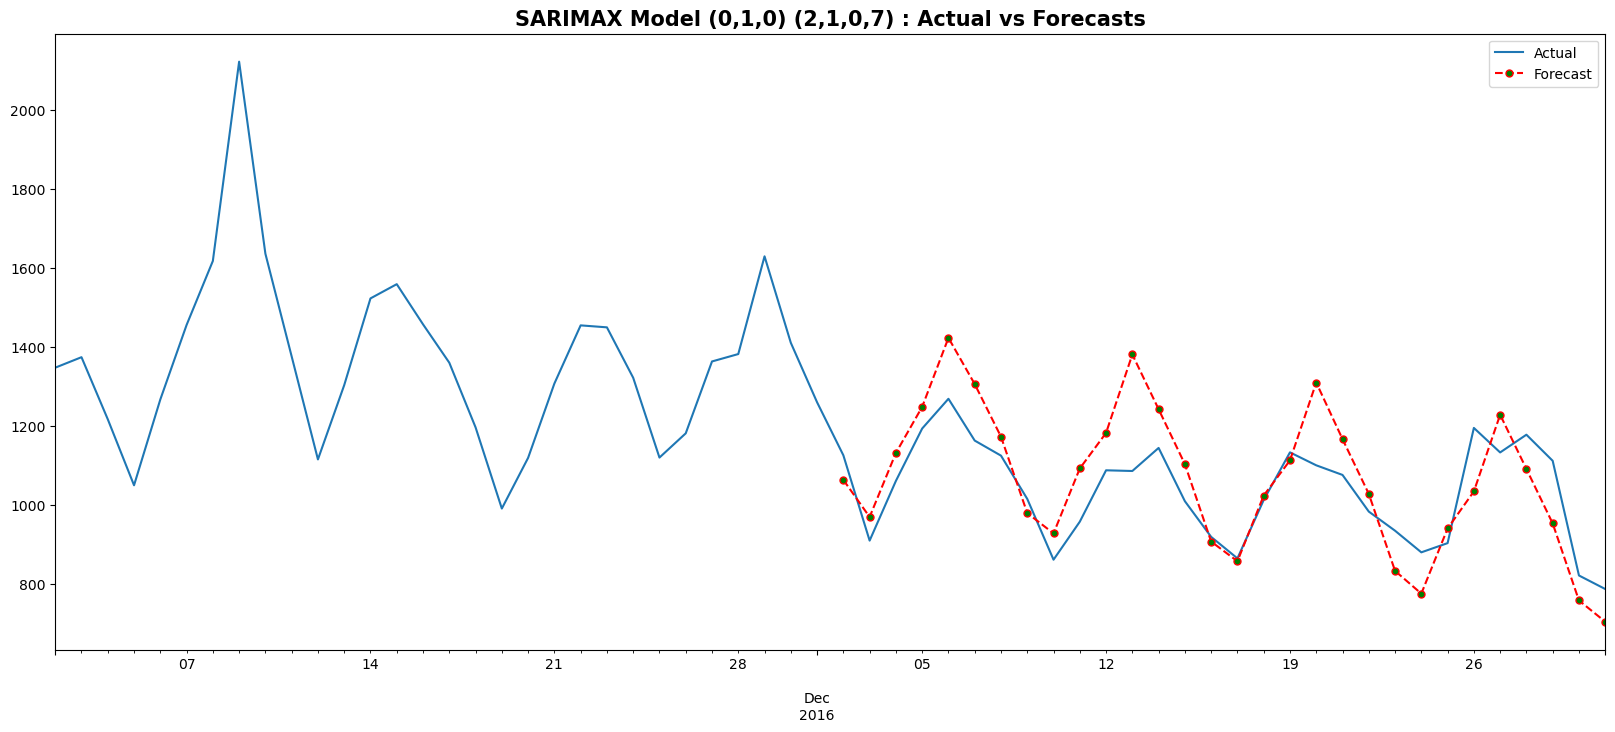

0

In [118]:
#Plotting SARIMAX model for each Language Time Series
languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30 
plot_best_SARIMAX_model(languages, df2, n, best_param_df)

#  Model using Prophet

In [119]:
from prophet import Prophet

In [120]:
model = Prophet()

In [121]:
time_series = df1.English
time_series = time_series.reset_index()
time_series = time_series[['index', 'English']]
time_series.columns = ['ds', 'y']
exog = exo.copy(deep = True)
time_series['exog'] = exog.values



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


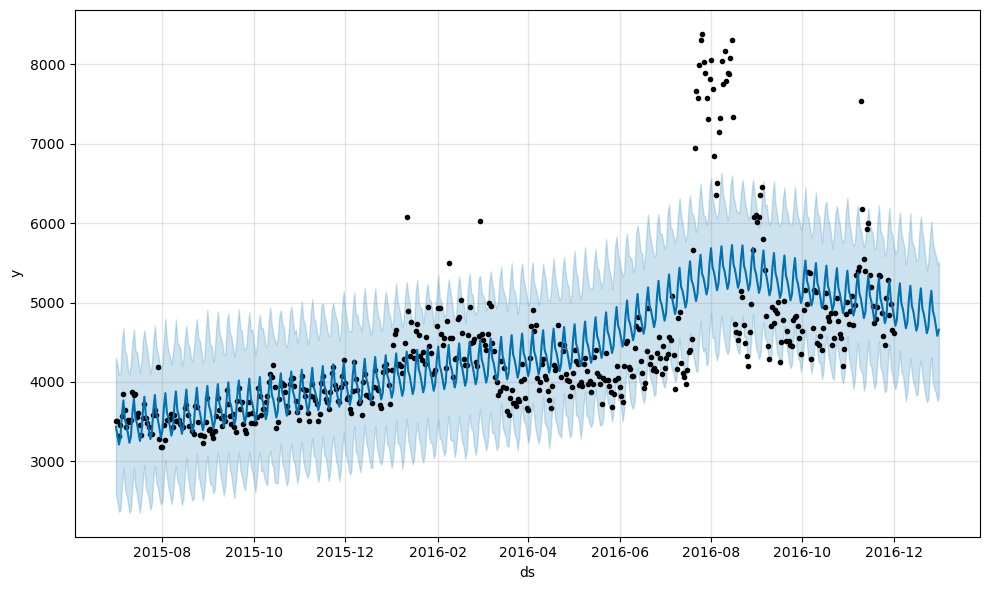

In [122]:
prophet1 = Prophet(weekly_seasonality=True)
prophet1.fit(time_series[['ds', 'y']][:-30])
future = prophet1.make_future_dataframe(periods=30, freq= 'D')
forecast = prophet1.predict(future)
fig1 = prophet1.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


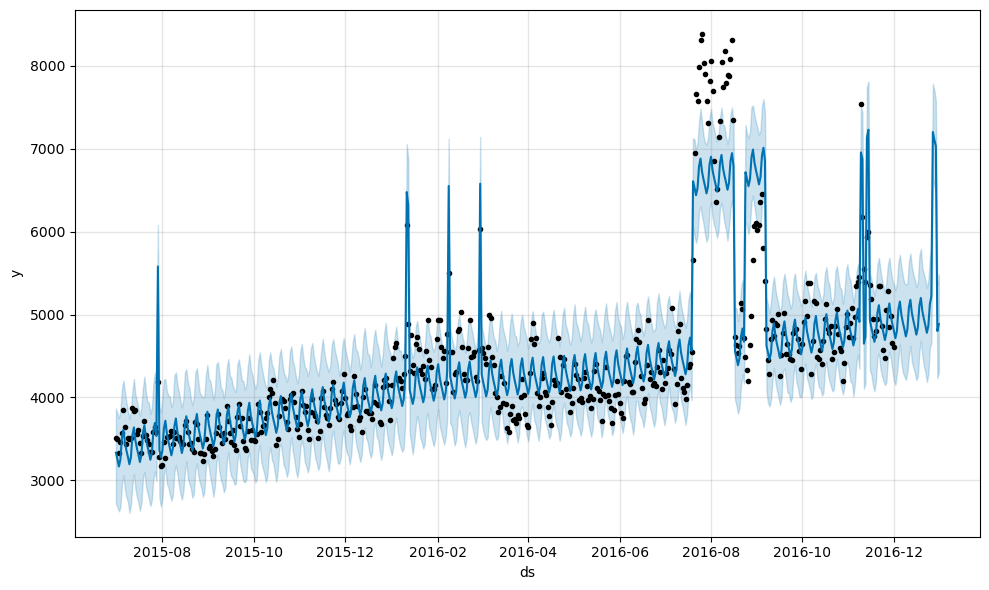

In [123]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

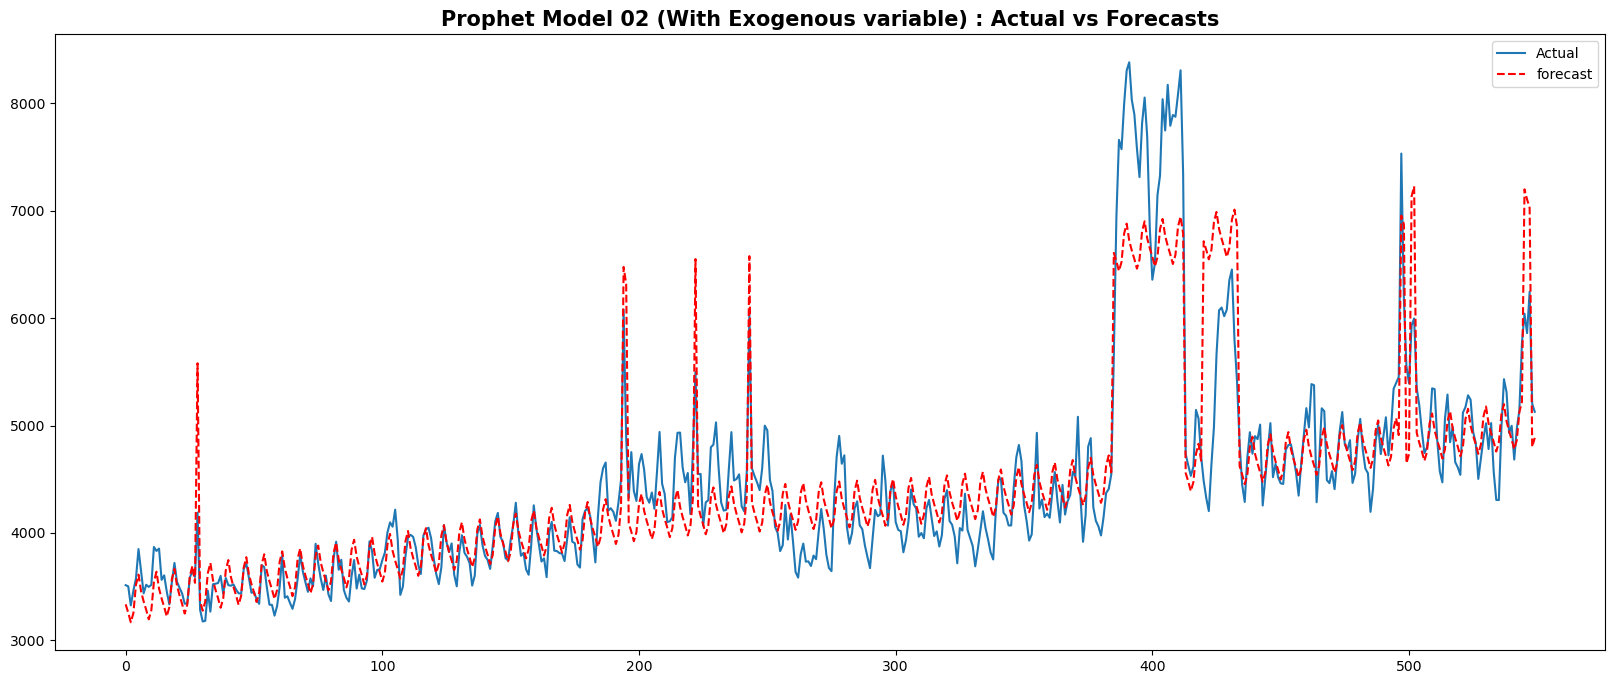

In [124]:
actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [126]:
errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))*100
mape

5.94471749404627

# Business Decision and Recommendations

## Mape per page

In [144]:
new_row = ['English', 2,0,1,1,0,1,7, 0.05]
best_param_df.loc[len(best_param_df)] = new_row
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,0,1,0,1,0,2,7,0.03
4,Russian,0,0,2,1,0,1,7,0.04
1,French,0,0,2,2,1,2,7,0.06
2,German,0,1,1,1,0,1,7,0.07
3,Japenese,0,1,2,2,1,0,7,0.07
5,Spanish,0,1,0,2,1,0,7,0.09
6,English,2,0,1,1,0,1,7,0.05


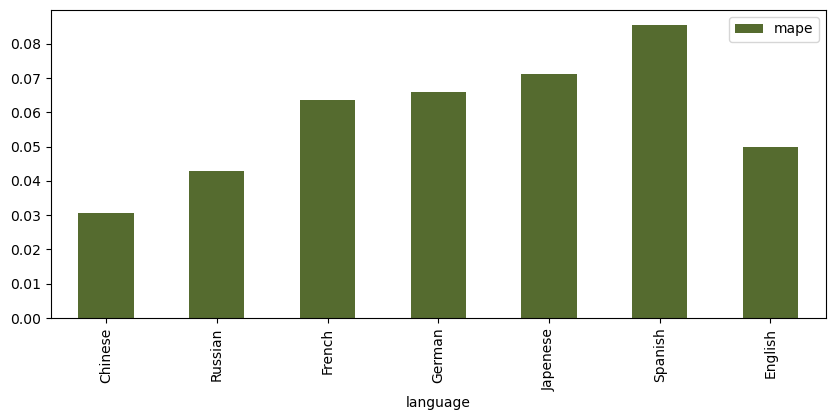

In [145]:
best_param_df[['language','mape']].set_index('language').plot(kind='bar',figsize = (10,4),color='darkolivegreen');

## Average visits per page

In [146]:
m_visit = pd.DataFrame(df1.mean()).reset_index().rename(columns={0:'mean_visit'})

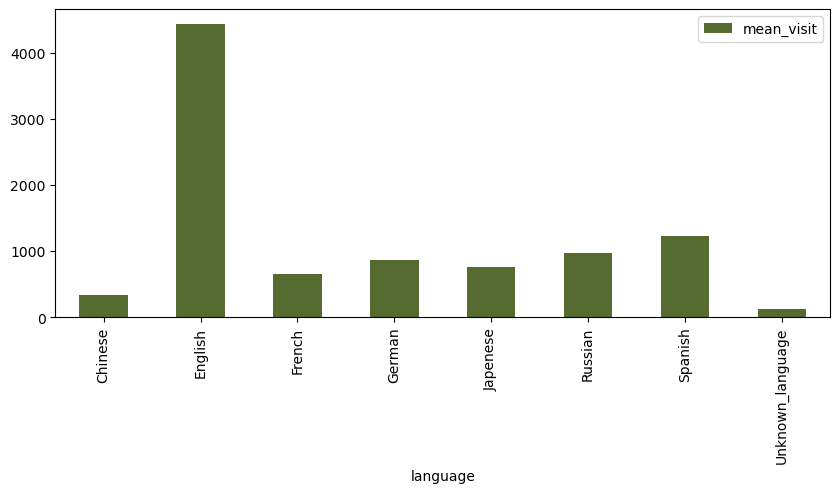

In [147]:
m_visit.set_index('language').plot(kind='bar',figsize = (10,4),color='darkolivegreen');

## Observations:

- As English page gets maximum page visits, thus english page must get most priority in landing advertisements.




- Second best page for advertisements is Spanish page followed by Russian and German.

# Questionare:

### Defining the problem statements and where can this and modifications of this be used?

- As the Data Science division at Ad ease we are  conducting an extensive analysis of the per page view statistics for various Wikipedia pages over a period of 550 days. Our goal is to forecast the number of page views, allowing us to make informed decisions regarding the placement of our clients' advertisements. We have been provided with data for 145,000 Wikipedia pages, including daily view count information. Our clients come from a variety of regions and require data on how their advertisements will perform on pages in different languages.

- By creating a robust forecasting model to predict changes in page views, we can support the business team in optimizing their marketing efforts. Accurately predicting peak traffic days allows the business to run advertisements during those times, maximizing their reach while maintaining cost-effectiveness.

### Write 3 inferences you made from the data visualizations

- As English page gets maximum page visits, thus english page must get most priority in landing advertisements.




- Second best page for advertisements is Spanish page followed by Russian and German.




- The downtrend in missing values could indicate that the number of visitors to the wiki pages has increased over time, leading to more complete data for recent dates.

### What does the decomposition of series do?

The decomposition of a time series is a statistical technique that involves breaking down a time series into its component parts, including the trend, seasonality, and residuals (also known as noise or error).

The purpose of decomposing a time series is to understand the underlying patterns and relationships in the data, and to make it easier to model and forecast the data. By separating the time series into its constituent parts, we can better understand the underlying drivers of the data and identify any unusual or unexpected behavior.

The trend component represents the underlying long-term direction of the data. The seasonality component captures the recurring patterns in the data, such as daily, weekly, or yearly patterns. The residual component represents the remaining portion of the time series after removing the trend and seasonality components, and it represents the random variations in the data that cannot be explained by the other components.

Decomposition can be performed using various methods, such as additive decomposition and multiplicative decomposition, depending on the nature of the data and the underlying patterns. The results of the decomposition can be used to improve the accuracy of time series models and forecasts, and to identify and address any issues in the data that may affect the accuracy of the forecasts.

### What level of differencing gave you a stationary series?

Differencing is a technique used in time series analysis to make a non-stationary time series stationary, which is a necessary condition for many time series modeling and forecasting techniques. A time series is considered non-stationary if its mean or variance changes over time, making it difficult to model and forecast accurately.



- In my case second level of differencing is done to make data stationary.

### Difference between arima, sarima & sarimax.

ARIMA, SARIMA, and SARIMAX are all time series models used for forecasting, but they have some differences.

ARIMA stands for Autoregressive Integrated Moving Average. It is a linear model that uses past values of the time series to model the future values. ARIMA models the time series by considering the autoregression (AR), the difference order (I), and the moving average (MA) components.

SARIMA stands for Seasonal Autoregressive Integrated Moving Average. It is an extension of ARIMA that takes into account seasonality in the time series data. SARIMA models the time series by considering both the non-seasonal and seasonal components of the time series.

SARIMAX stands for Seasonal Autoregressive Integrated Moving Average with eXogenous variables. It is an extension of SARIMA that includes additional variables (known as exogenous variables) that may affect the time series, such as economic indicators, weather data, etc. SARIMAX allows us to model the time series in the presence of these exogenous variables and to account for their impact on the time series.

```In summary, ARIMA is a linear time series model that considers the autoregression, difference order, and moving average components of the time series. SARIMA is an extension of ARIMA that takes into account seasonality in the time series. SARIMAX is an extension of SARIMA that includes exogenous variables that may affect the time series.```

### Compare the number of views in different languages

```English > Spanish > Russian > German > Japenese > French > Chinese```


```4430.73 > 1226.45 > 968.08 >  868.75 > 762.77  >  651.39  > 334.74```

### What other methods other than grid search would be suitable to get the model for all languages?

There are several methods other than grid search that can be used to find the best model, some of which are:

Random Search: Instead of systematically trying all possible combinations of parameters, random search randomly selects values from a predefined distribution of parameter values. This method can be more efficient than grid search when the number of parameters is high.

Bayesian Optimization: This method uses Bayesian statistics to model the relationship between the parameters and the model's performance. The optimization algorithm then uses this model to identify the next set of parameters to test.

Genetic Algorithms: Genetic algorithms are inspired by the process of natural selection and evolution. They start with a random population of candidate models and use selection, mutation, and crossover operations to generate new generations of models. The best models from each generation are selected to continue to the next generation, until a stopping criterion is met.

Particle Swarm Optimization: Particle Swarm Optimization is a metaheuristic optimization algorithm that is inspired by the behavior of bird flocks and fish schools. It starts with a random population of candidate models and uses velocity updates and global and local best solutions to generate new models. The algorithm continues until a stopping criterion is met.

Each of these methods has its own advantages and disadvantages, and the choice of method will depend on the specific requirements of the problem at hand. However, the key point is that grid search is not the only method for model selection, and there are other methods that can be used to find the best model for time series data.

___

# -----------------------------------------END---------------------------------------------------